# Analysis of ELI-VR and BA Questionnaire Data

Author: Zora Nolte

Last updated: 11.03.2022

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import seaborn as sns

# ELI-VR Questionnaire Data

In [3]:
df = pd.read_csv("data/data_questionnaires_preprocessed.csv")

In [4]:
#df[df["blob"] == 1]["ID"].tolist()

In [5]:
print("In total, there were {} participants.".format(len(df)))

In total, there were 83 participants.


In [6]:
print("{} participants were in the blob condition, {} in the avatar condition.".format(df["blob"].value_counts()[1], df["blob"].value_counts()[0]))

40 participants were in the blob condition, 43 in the avatar condition.


In [7]:
def createBoxplot(data, ax, title, labels=None, xlabel='', fontsize=16):
    sns.boxplot(data=data, ax=ax, showmeans=True, meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"black"})
    if labels:
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels) 
    ax.set_title(title, pad=20, fontsize=fontsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')

In [8]:
def secondXAxis(originalaxis, xticks, minorlocations, minorlabels):
    # Second X-axis
    ax2 = originalaxis.twiny()

    ax2.spines["bottom"].set_position(("axes", -0.1))
    ax2.tick_params('both', length=0, width=0, which='minor')
    ax2.tick_params('both', direction='in', which='major')
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")

    ax2.set_xticks(xticks)
    ax2.xaxis.set_major_formatter(ticker.NullFormatter())
    ax2.xaxis.set_minor_locator(ticker.FixedLocator(minorlocations))
    ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(minorlabels))

### Questionnaires overview

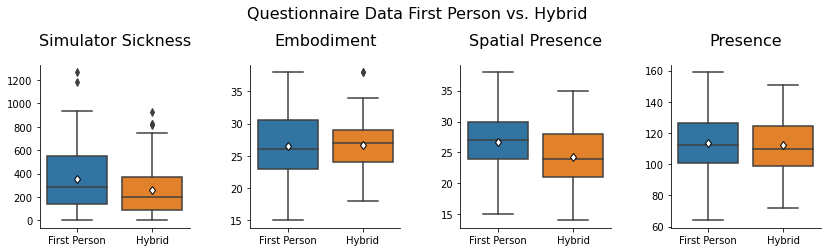

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))
plt.subplots_adjust(wspace=0.4)
fig.suptitle('Questionnaire Data First Person vs. Hybrid', fontsize=16, y=1.15)

axes = axes.ravel()

sns.set_palette("tab10")

createBoxplot(df[["SSQ_TS_FP", "SSQ_TS_H"]], axes[0], "Simulator Sickness", ["First Person", "Hybrid"])
createBoxplot(df[["EB_EB_FP", "EB_EB_H"]], axes[1], "Embodiment", ["First Person", "Hybrid"])
createBoxplot(df[["EB_SP_FP", "EB_SP_H"]], axes[2], "Spatial Presence", ["First Person", "Hybrid"])
createBoxplot(df[["P_FP", "P_H"]], axes[3], "Presence", ["First Person", "Hybrid"])

sns.despine()

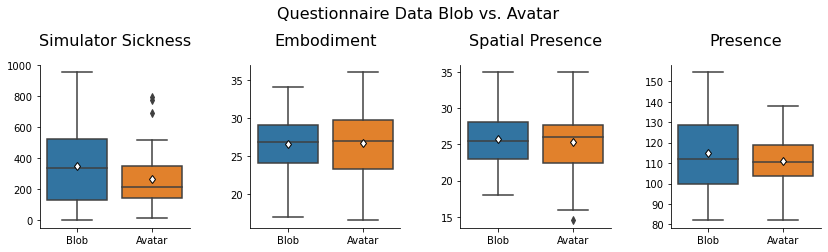

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))
plt.subplots_adjust(wspace=0.4)
fig.suptitle('Questionnaire Data Blob vs. Avatar', fontsize=16, y=1.15)

axes = axes.ravel()

sns.set_palette("tab10")

createBoxplot([df[df["blob"]==1]['SSQ_TS_AVG'],df[df["blob"]==0]['SSQ_TS_AVG']], axes[0], "Simulator Sickness", ["Blob", "Avatar"])
createBoxplot([df[df["blob"]==1]['EB_EB_AVG'],df[df["blob"]==0]['EB_EB_AVG']], axes[1], "Embodiment", ["Blob", "Avatar"])
createBoxplot([df[df["blob"]==1]['EB_SP_AVG'],df[df["blob"]==0]['EB_SP_AVG']], axes[2], "Spatial Presence", ["Blob", "Avatar"])
createBoxplot([df[df["blob"]==1]['P_AVG'],df[df["blob"]==0]['P_AVG']], axes[3], "Presence", ["Blob", "Avatar"])

sns.despine()

### Questionnaires subscales

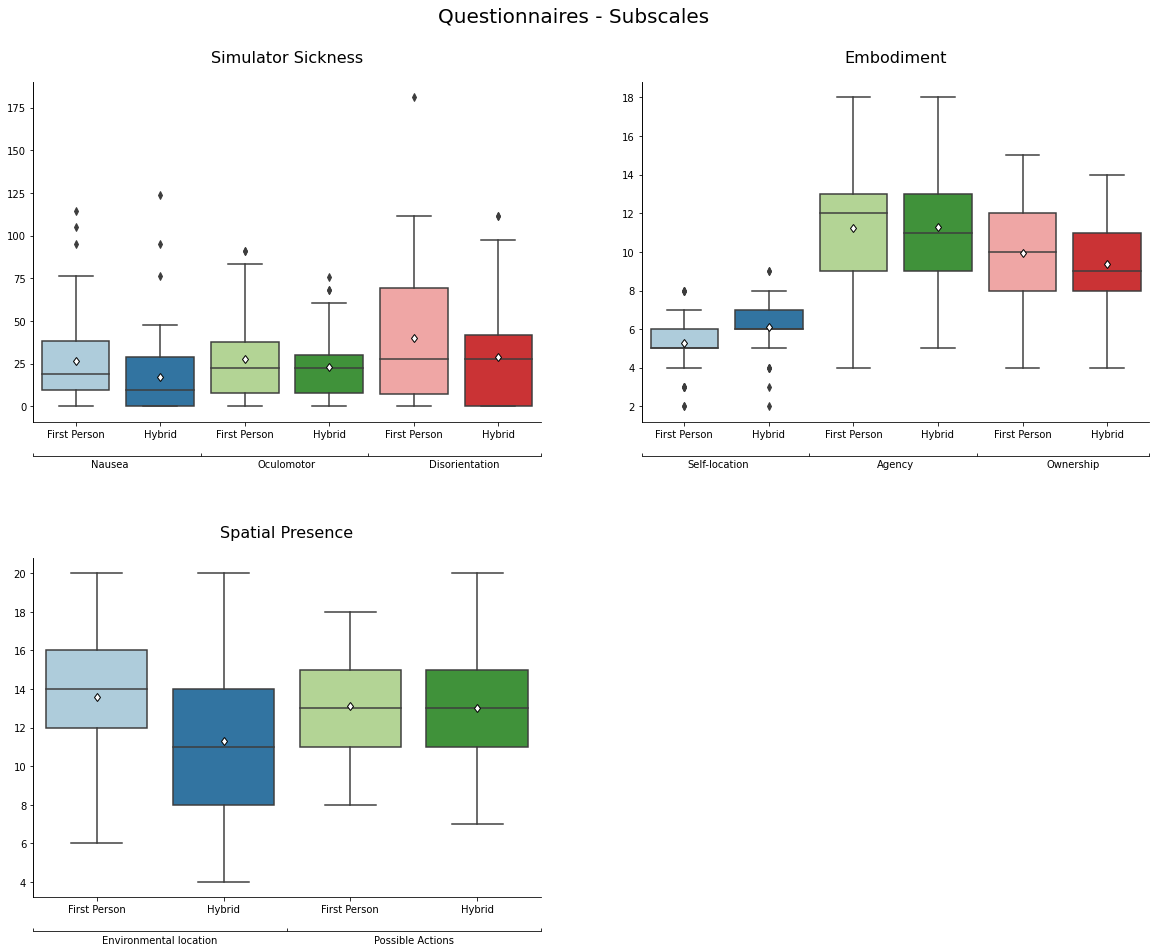

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
fig.suptitle("Questionnaires - Subscales", y=0.95, fontsize=20)
plt.subplots_adjust(hspace=0.4)
sns.set_palette("Paired")
axes = axes.ravel()

createBoxplot(df[['SSQ_N_FP', 'SSQ_N_H', 
                  'SSQ_O_FP', 'SSQ_O_H',
                  'SSQ_D_FP', 'SSQ_D_H']], 
              axes[0], 
              "Simulator Sickness",
             ["First Person", "Hybrid"]*3,
             fontsize=16)
secondXAxis(axes[0], [0.0, 0.33, 0.66, 1.0], [0.15, 0.5, 0.85], ['Nausea', 'Oculomotor', 'Disorientation'])

createBoxplot(df[['EB_SL_FP', 'EB_SL_H',
                  'EB_A_FP', 'EB_A_H',
                  'EB_O_FP', 'EB_O_H']], 
              axes[1], 
              "Embodiment",
             ["First Person", "Hybrid"]*3,
             fontsize=16)
secondXAxis(axes[1], [0.0, 0.33, 0.66, 1.0], [0.15, 0.5, 0.85], ['Self-location', 'Agency', 'Ownership'])

createBoxplot(df[['EB_EL_FP', 'EB_EL_H',
                  'EB_PA_FP', 'EB_PA_H']], 
              axes[2], 
              "Spatial Presence",
             ["First Person", "Hybrid"]*2,
             fontsize=16)

secondXAxis(axes[2], [0.0,0.5, 1.0], [0.25, 0.75], ['Environmental location', 'Possible Actions'])

''' Presence doesnt have subscales
createBoxplot(df[['P_FP', 'P_H']], 
              axes[3], 
              "Presence",
             ["First Person", "Hybrid"],
             fontsize=16)
'''
axes[3].axis("off")
              
sns.despine()

### In-game motion sickness ratings

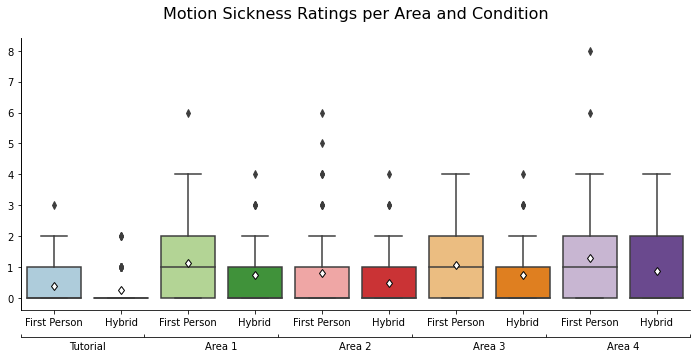

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
sns.set_palette("Paired")

createBoxplot(df[["FP_0_MS", "H_0_MS",
                  "FP_1_MS", "H_1_MS", 
                  "FP_2_MS", "H_2_MS",
                  "FP_3_MS", "H_3_MS",
                  "FP_4_MS", "H_4_MS",]], 
              axes, 
              "Motion Sickness Ratings per Area and Condition", 
              ["First Person", "Hybrid"]*5)

secondXAxis(axes, [0.0, 0.185, 0.385, 0.585, 0.785, 1.0], [0.1, 0.3, 0.5, 0.7, 0.9], ['Tutorial', 'Area 1', 'Area 2', 'Area 3', 'Area 4'])

sns.despine()


### Correlation between in-game MS ratings and SSQ

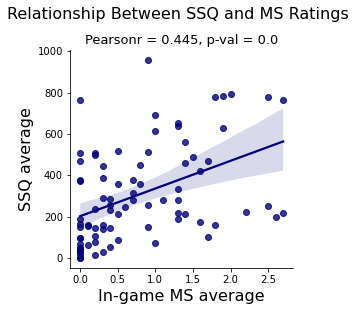

Effect size according to Cohen: medium


In [13]:
fig, ax = plt.subplots(figsize=(4,4))
x = df[["H_AVG_MS", "FP_AVG_MS"]].mean(axis=1)
y = df["SSQ_TS_AVG"]
corr = stats.pearsonr(x, y)
sns.regplot(x=x, y=y, ax=ax, marker='o', color='navy')

fig.suptitle("Relationship Between SSQ and MS Ratings", fontsize=16, y=1.03)
ax.set_title("Pearsonr = {}, p-val = {}".format(corr[0].round(3), corr[1].round(3)), fontsize=13)
ax.set_ylabel("SSQ average",fontsize=16)
ax.set_xlabel("In-game MS average",fontsize=16)

sns.despine()
plt.show()

eff = None
if 0.1 <= corr[0] <= 0.3:
    eff = "small"
elif 0.3 < corr[0] <= 0.5:
    eff = "medium"
elif 0.5 < corr[0] <= 1.0:
    eff = "large"

if eff is not None:
    print("Effect size according to Cohen: " + eff)
else:
    print("The correlation is not significant.")

### Descriptives

In [14]:
print("\033[1mDescriptives SSQ ELI-VR:\033[0m")
df[['SSQ_N_FP', 'SSQ_O_FP', 'SSQ_D_FP', 'SSQ_TS_FP','SSQ_N_H', 'SSQ_O_H', 'SSQ_D_H', 'SSQ_TS_H','SSQ_N_AVG', 'SSQ_O_AVG', 'SSQ_D_AVG', 'SSQ_TS_AVG']].describe().round(decimals=2)

Descriptives SSQ ELI-VR:


,SSQ_N_FP,SSQ_O_FP,SSQ_D_FP,SSQ_TS_FP,SSQ_N_H,SSQ_O_H,SSQ_D_H,SSQ_TS_H,SSQ_N_AVG,SSQ_O_AVG,SSQ_D_AVG,SSQ_TS_AVG
count,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00
mean,26.32,27.76,40.08,352.18,17.47,23.11,28.68,259.01,21.90,25.43,34.38,305.60
std,24.00,21.38,37.93,280.06,21.01,18.14,29.52,226.80,19.57,18.15,31.47,232.78
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.54,7.58,6.96,137.11,0.00,7.58,0.00,92.38,9.54,11.37,6.96,142.61
50%,19.08,22.74,27.84,287.16,9.54,22.74,27.84,196.50,19.08,22.74,20.88,248.67
75%,38.16,37.90,69.60,547.09,28.62,30.32,41.76,372.95,28.62,34.11,62.64,462.41
max,114.48,90.96,180.96,1266.74,124.02,75.80,111.36,922.58,100.17,75.80,132.24,956.47


In [15]:
print("\033[1mDescriptives Presence ELI-VR:\033[0m")
df[['P_FP', 'P_H', 'P_AVG']].describe().round(decimals=2).rename(columns={'P_FP': 'Presence First Person', 'P_H': 'Hybrid', 'P_AVG': 'Average'})

Descriptives Presence ELI-VR:


,Presence First Person,Hybrid,Average
count,83.0,83.00,83.00
mean,113.3,112.28,112.79
std,17.5,17.12,15.08
min,64.0,72.00,82.00
25%,100.5,99.00,101.25
50%,112.0,110.00,111.00
75%,126.5,124.50,125.00
max,159.0,151.00,154.50


In [16]:
# Embodiment subscales + total
print("\033[1mDescriptives Embodiment ELI-VR:\033[0m")
cols = {'EB_SL_FP': 'Self-Location First Person', 'EB_A_FP': 'Agency First Person', 'EB_O_FP': 'Ownership First Person',
       'EB_SL_H': 'Self-Location Hybrid', 'EB_A_H': 'Agency Hybrid', 'EB_O_H': 'Ownership Hybrid',
       'EB_EB_FP': 'Average First Person', 'EB_EB_H': 'Averagel Hybrid', 'EB_EB_AVG' : 'Total Average'}
df[['EB_SL_FP', 'EB_A_FP', 'EB_O_FP', 'EB_EB_FP', 'EB_SL_H', 'EB_A_H', 'EB_O_H', 'EB_EB_H', 'EB_EB_AVG']].describe().round(decimals=2).rename(columns=cols)

Descriptives Embodiment ELI-VR:


,Self-Location First Person,Agency First Person,Ownership First Person,Average First Person,Self-Location Hybrid,Agency Hybrid,Ownership Hybrid,Averagel Hybrid,Total Average
count,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00
mean,5.29,11.25,9.93,26.47,6.11,11.27,9.40,26.77,26.62
std,1.17,3.25,2.47,5.16,1.20,2.80,2.28,4.43,4.17
min,2.00,4.00,4.00,15.00,2.00,5.00,4.00,18.00,16.50
25%,5.00,9.00,8.00,23.00,6.00,9.00,8.00,24.00,24.00
50%,5.00,12.00,10.00,26.00,6.00,11.00,9.00,27.00,27.00
75%,6.00,13.00,12.00,30.50,7.00,13.00,11.00,29.00,29.25
max,8.00,18.00,15.00,38.00,9.00,18.00,14.00,38.00,36.00


In [17]:
# Spatial Presence subscales + total
print("\033[1mDescriptives Spatial Presence ELI-VR:\033[0m")
cols = {'EB_EL_FP': 'Environmental Location First Person', 'EB_PA_FP': 'Possible Actions First Person',
       'EB_EL_H': 'Environmental Location Hybrid', 'EB_PA_H': 'Possible Actions Hybrid',
       'EB_SP_FP': 'Average First Person', 'EB_SP_H': 'Averagel Hybrid', 'EB_SP_AVG' : 'Total Average'}

df[['EB_EL_FP', 'EB_PA_FP', 'EB_SP_FP', 'EB_EL_H', 'EB_PA_H', 'EB_SP_H', 'EB_SP_AVG']].describe().round(decimals=2).rename(columns=cols)

Descriptives Spatial Presence ELI-VR:


,Environmental Location First Person,Possible Actions First Person,Average First Person,Environmental Location Hybrid,Possible Actions Hybrid,Averagel Hybrid,Total Average
count,83.00,83.00,83.00,83.00,83.00,83.00,83.00
mean,13.59,13.12,26.71,11.29,13.02,24.31,25.51
std,3.20,2.53,4.97,3.63,2.64,5.15,4.35
min,6.00,8.00,15.00,4.00,7.00,14.00,14.50
25%,12.00,11.00,24.00,8.00,11.00,21.00,23.00
50%,14.00,13.00,27.00,11.00,13.00,24.00,25.50
75%,16.00,15.00,30.00,14.00,15.00,28.00,28.25
max,20.00,18.00,38.00,20.00,20.00,35.00,35.00


# Preferred way of locomotion & VG/ VR experience

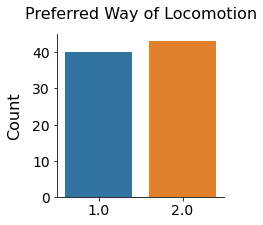

In [18]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
sns.countplot(x=df["VR06"].tolist() + df["VR17"].tolist(), ax=ax, palette= sns.color_palette("tab10"));
#ax.set_xticklabels(["First person", "Hybrid"]);
ax.set_title("Preferred Way of Locomotion", fontsize=16, pad=15);
ax.set_ylabel("Count")
ax.yaxis.label.set_size(16)
ax.yaxis.labelpad = 10
ax.tick_params(axis='both', which='major', labelsize=14)
sns.despine()
# 1: first person, 2: hybrid

In [19]:
df_loco_pref = df[['VR17', 'VR06']]
df_loco_pref = df_loco_pref.fillna(0)
df_loco_pref = pd.DataFrame(sum(x) for x in zip(df_loco_pref.VR06.tolist(), df_loco_pref.VR17.tolist()))

df_loco_pref.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [20]:
df_loco_pref = pd.DataFrame(df_loco_pref.value_counts() / len(df_loco_pref))
df_loco_pref.rename(columns={0 : 'value'}, inplace=True)
df_loco_pref.reset_index(inplace=True)
df_loco_pref

,0,value
0,2.0,0.518072
1,1.0,0.481928


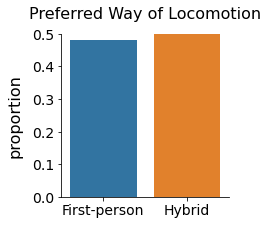

In [21]:
fig, ax = plt.subplots(figsize=(3,3))

sns.barplot(
    data=df_loco_pref,
    x=0,
    y='value',
    palette= sns.color_palette("tab10"),
    ax=ax
)

ax.set_xticklabels(["First-person", "Hybrid"]);
ax.set_title("Preferred Way of Locomotion", fontsize=16, pad=15);
ax.set_ylabel('proportion')
ax.set_xlabel('')
ax.yaxis.label.set_size(16)
ax.yaxis.labelpad = 10
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0, 0.5)
sns.despine()

plt.show()

In [22]:
pd.concat([df["VR06"], df["VR17"]]).dropna().describe()

count    83.000000
mean      1.518072
std       0.502711
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
dtype: float64

In [23]:
def plot_VG_exp(mode, title, color=None):
    '''
    mode (int): 1 for fp, 2 for hybrid
    '''
    fig, ax = plt.subplots(1,2, figsize=(20,4))
    ax = ax.ravel()
    plt.suptitle(title, fontsize=20, y=1.1)

    sns.despine()

    temp = df[(df["VR06"] == mode) | (df["VR17"] == mode)]
    counts1 = [len(temp[temp["VR02_01"] == 2]) + len(temp[temp["VR13_01"] == 2]),
             len(temp[temp["VR02_02"] == 2]) + len(temp[temp["VR13_02"] == 2]),
             len(temp[temp["VR02_03"] == 2]) + len(temp[temp["VR13_03"] == 2]),
             len(temp[temp["VR02_04"] == 2]) + len(temp[temp["VR13_04"] == 2]),
             len(temp[temp["VR02_05"] == 2]) + len(temp[temp["VR13_05"] == 2]),
             len(temp[temp["VR02_06"] == 2]) + len(temp[temp["VR13_06"] == 2]),
             len(temp[temp["VR02_07"] == 2]) + len(temp[temp["VR13_07"] == 2]),]
    names1 = ["Shooter", "Adventure", "Construction", "Puzzles", "Chess or similar", "Other", "None"]

    ax[0].set_title("Type", fontsize=16, pad=20)
    ax[0].tick_params(axis='both', which='major', labelsize=10)
    ax[0].set_ylabel('Count', fontsize=16)   
    ax[0].bar(x=names1, height=counts1, color=color)

    counts2 = [len(temp[temp["VR03_01"] == 2]) + len(temp[temp["VR14_01"] == 2]),
             len(temp[temp["VR03_02"] == 2]) + len(temp[temp["VR14_02"] == 2]),
             len(temp[temp["VR03_03"] == 2]) + len(temp[temp["VR14_03"] == 2]),
             len(temp[temp["VR03_06"] == 2]) + len(temp[temp["VR14_06"] == 2])]
    names2 = ["First Person", "Third Person", "Top-Down", "All"]


    ax[1].set_title("Perspective", fontsize=16, pad=20)
    ax[1].tick_params(axis='both', which='major', labelsize=10)
    ax[1].set_ylabel('Count', fontsize=16)   
    ax[1].bar(x=names2, height=counts2, color=color)

    plt.setp(ax, ylim=(0, 25))
    print("Counts Type:")
    print(counts1)

    print("Counts Perspective:")
    print(counts2)

Counts Type:
[17, 17, 12, 12, 9, 17, 12]
Counts Perspective:
[16, 20, 5, 7]


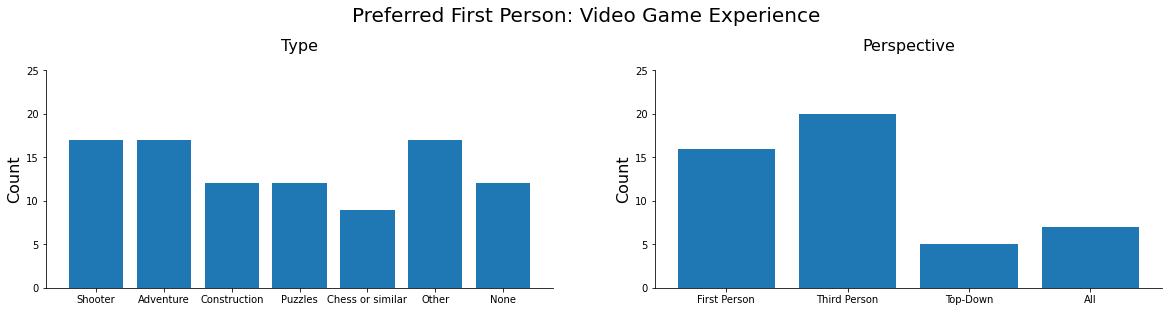

In [24]:
plot_VG_exp(1, "Preferred First Person: Video Game Experience", sns.color_palette("tab10")[0])

Counts Type:
[18, 18, 17, 13, 10, 14, 12]
Counts Perspective:
[10, 18, 12, 8]


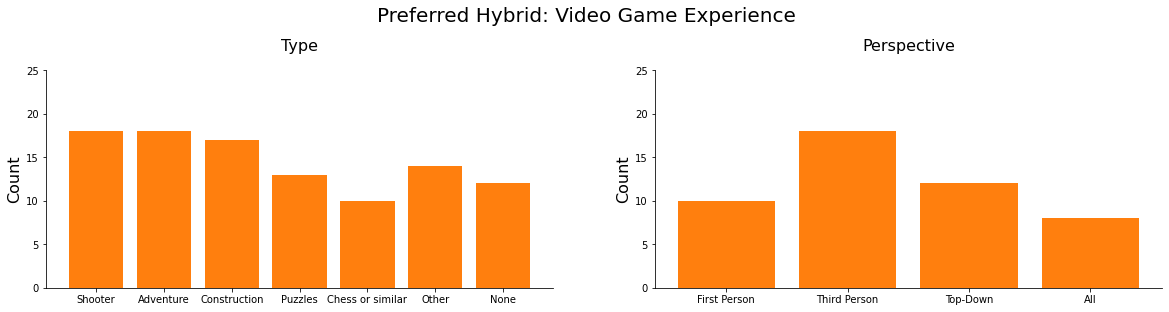

In [25]:
plot_VG_exp(2, "Preferred Hybrid: Video Game Experience", sns.color_palette("tab10")[1])

In [26]:
def plot_VR_exp(mode, title, color=None):
    '''
    mode (int): 1 for fp, 2 for hybrid
    '''
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    plt.suptitle(title, fontsize=20, y=1.1)

    sns.despine()

    temp = df[(df["VR06"] == mode) | (df["VR17"] == mode)]
    counts = [len(temp[temp["VR05_01"] == 2]) + len(temp[temp["VR16_01"] == 2]),
             len(temp[temp["VR05_02"] == 2]) + len(temp[temp["VR16_02"] == 2]),
             len(temp[temp["VR05_03"] == 2]) + len(temp[temp["VR16_03"] == 2]),
             len(temp[temp["VR05_06"] == 2]) + len(temp[temp["VR16_06"] == 2]),
             len(temp[temp["VR05_07"] == 2]) + len(temp[temp["VR16_07"] == 2]),
             len(temp[temp["VR05_08"] == 2]) + len(temp[temp["VR16_08"] == 2]),
             len(temp[temp["VR05_09"] == 2]) + len(temp[temp["VR16_09"] == 2]),]
    names = ["Occulus Rift/\nQuest etc.", "HTCVive", "Valve Index", 
             "Google \nCardboard", "Samsung \nGear VR", "Other", "I don't know"]

    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_ylabel('Count', fontsize=16)   
    ax.bar(x=names, height=counts, color=color)


    print("Counts:")
    print(counts)


Counts:
[6, 7, 0, 2, 0, 2, 11]


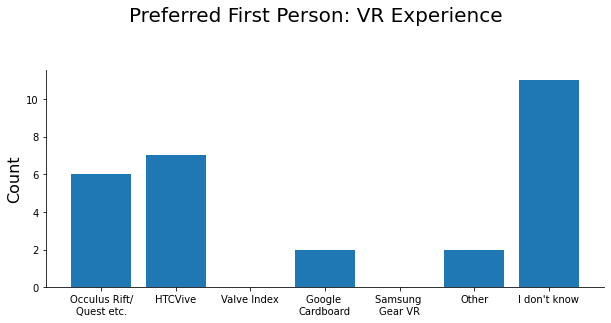

In [27]:
plot_VR_exp(1, "Preferred First Person: VR Experience", sns.color_palette('tab10')[0])

Counts:
[10, 13, 2, 1, 2, 1, 10]


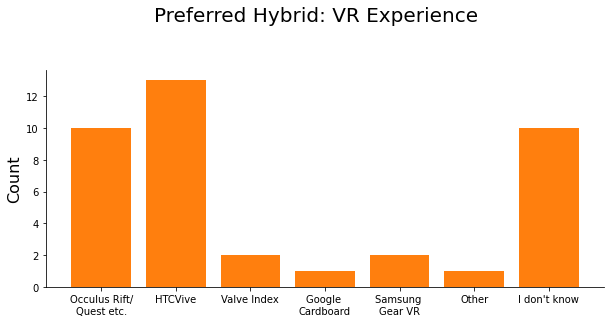

In [28]:
plot_VR_exp(2, "Preferred Hybrid: VR Experience", sns.color_palette('tab10')[1])

In [29]:
df_ranking = pd.read_excel('data/data_questionnaires.xlsx')
df_ranking_areas = df_ranking[['VR08_01', 'VR08_02', 'VR08_03', 'VR08_04', 'VR09_01', 'VR09_02', 'VR09_03', 'VR09_04', 'VR10_01', 'VR10_02', 'VR10_03', 'VR10_04']]
df_ranking_areas.head()

,VR08_01,VR08_02,VR08_03,VR08_04,VR09_01,VR09_02,VR09_03,VR09_04,VR10_01,VR10_02,VR10_03,VR10_04
0,4.0,1.0,3.0,2.0,3.0,1.0,2.0,4.0,3.0,1.0,2.0,4.0
1,4.0,1.0,2.0,3.0,2.0,1.0,3.0,4.0,2.0,1.0,4.0,3.0
2,2.0,1.0,3.0,4.0,2.0,1.0,4.0,3.0,3.0,1.0,2.0,4.0
3,3.0,1.0,2.0,4.0,3.0,1.0,2.0,4.0,4.0,1.0,2.0,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
display(
    f'Length: {len(df_ranking_areas)}',
    f'Number of NAs: {df_ranking_areas.isna().sum().mean()}'
)

'Length: 83'

'Number of NAs: 13.0'

In [31]:
df_ranking_areas.dropna(inplace=True)

display(
    f'Length: {len(df_ranking_areas)}',
    f'Number of NAs: {df_ranking_areas.isna().sum().mean()}'
)

C:\ProgramData\Anaconda3\envs\ELI-VR\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


'Length: 70'

'Number of NAs: 0.0'

In [32]:
q1 = df_ranking_areas[['VR08_01', 'VR08_02', 'VR08_03', 'VR08_04']]
q1 = q1.reset_index().rename(columns={'index' : 'subject'})
q1.head()

,subject,VR08_01,VR08_02,VR08_03,VR08_04
0,0,4.0,1.0,3.0,2.0
1,1,4.0,1.0,2.0,3.0
2,2,2.0,1.0,3.0,4.0
3,3,3.0,1.0,2.0,4.0
4,5,4.0,1.0,3.0,2.0


In [33]:
q2 = df_ranking_areas[['VR09_01', 'VR09_02', 'VR09_03', 'VR09_04']]
q2 = q2.reset_index().rename(columns={'index' : 'subject'})
q2.head()

,subject,VR09_01,VR09_02,VR09_03,VR09_04
0,0,3.0,1.0,2.0,4.0
1,1,2.0,1.0,3.0,4.0
2,2,2.0,1.0,4.0,3.0
3,3,3.0,1.0,2.0,4.0
4,5,1.0,2.0,3.0,4.0


In [34]:
q3 = df_ranking_areas[['VR10_01', 'VR10_02', 'VR10_03', 'VR10_04']]
q3 = q3.reset_index().rename(columns={'index' : 'subject'})
q3.head()

,subject,VR10_01,VR10_02,VR10_03,VR10_04
0,0,3.0,1.0,2.0,4.0
1,1,2.0,1.0,4.0,3.0
2,2,3.0,1.0,2.0,4.0
3,3,4.0,1.0,2.0,3.0
4,5,3.0,1.0,2.0,4.0


In [35]:
q1_df = (pd.melt(q1, value_vars=['VR08_01', 'VR08_02', 'VR08_03', 'VR08_04'], ignore_index=False)
         .reset_index()
         .rename(columns={'index' : 'subject', 'variable' : 'area', 'value' : 'rank'})
         .reset_index(drop=True)
         )
q1_df['area_cat'] = q1_df.area.map({'VR08_01' : 'A',
                            'VR08_02' : 'B',
                            'VR08_03' : 'C',
                            'VR08_04' : 'D'})
q1_df.head()

,subject,area,rank,area_cat
0,0,VR08_01,4.0,A
1,1,VR08_01,4.0,A
2,2,VR08_01,2.0,A
3,3,VR08_01,3.0,A
4,4,VR08_01,4.0,A


In [36]:
q2_df = (pd.melt(q2, value_vars=['VR09_01', 'VR09_02', 'VR09_03', 'VR09_04'], ignore_index=False)
         .reset_index()
         .rename(columns={'index' : 'subject', 'variable' : 'area', 'value' : 'rank'})
         .reset_index(drop=True)
         )
q2_df['area_cat'] = q2_df.area.map({'VR09_01' : 'A',
                                    'VR09_02' : 'B',
                                    'VR09_03' : 'C',
                                    'VR09_04' : 'D'})
q2_df.head()

,subject,area,rank,area_cat
0,0,VR09_01,3.0,A
1,1,VR09_01,2.0,A
2,2,VR09_01,2.0,A
3,3,VR09_01,3.0,A
4,4,VR09_01,1.0,A


In [37]:
q3_df = (pd.melt(q3, value_vars=['VR10_01', 'VR10_02', 'VR10_03', 'VR10_04'], ignore_index=False)
         .reset_index()
         .rename(columns={'index' : 'subject', 'variable' : 'area', 'value' : 'rank'})
         .reset_index(drop=True)
         )
q3_df['area_cat'] = q3_df.area.map({'VR10_01' : 'A',
                                    'VR10_02' : 'B',
                                    'VR10_03' : 'C',
                                    'VR10_04' : 'D'})
q3_df.head()

,subject,area,rank,area_cat
0,0,VR10_01,3.0,A
1,1,VR10_01,2.0,A
2,2,VR10_01,3.0,A
3,3,VR10_01,4.0,A
4,4,VR10_01,3.0,A


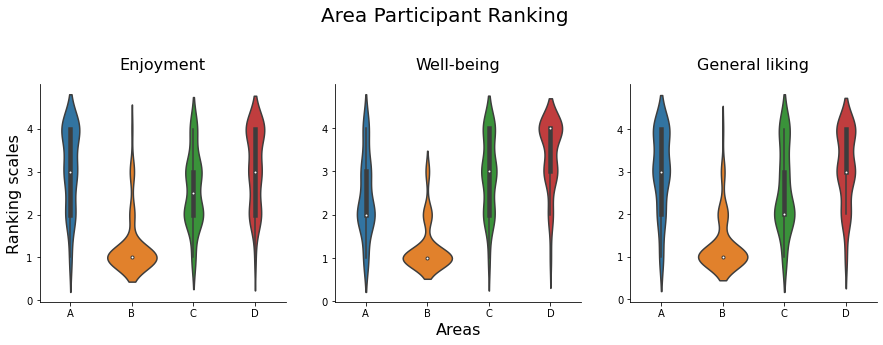

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.violinplot(
    data=q1_df,
    x='area_cat',
    y='rank',
    palette=sns.color_palette('tab10'),
    ax=axes[0]
)

sns.violinplot(
    data=q2_df,
    x='area_cat',
    y='rank',
    palette=sns.color_palette('tab10'),
    ax=axes[1]
)

sns.violinplot(
    data=q3_df,
    x='area_cat',
    y='rank',
    palette=sns.color_palette('tab10'),
    ax=axes[2]
)

axes[0].set_title('Enjoyment', fontsize=16, pad=15)
axes[0].set_ylabel('Ranking scales')
axes[0].set_xlabel('')
axes[0].set_yticks([0,1,2,3,4])
axes[0].yaxis.label.set_size(16)
axes[0].xaxis.label.set_size(16)

axes[1].set_title('Well-being', fontsize=16, pad=15)
axes[1].set_ylabel('')
axes[1].set_xlabel('Areas')
axes[1].set_yticks([0,1,2,3,4])
axes[1].yaxis.label.set_size(16)
axes[1].xaxis.label.set_size(16)

axes[2].set_title('General liking', fontsize=16, pad=15)
axes[2].set_ylabel('')
axes[2].set_xlabel('')
axes[2].set_yticks([0,1,2,3,4])
axes[2].yaxis.label.set_size(16)
axes[2].xaxis.label.set_size(16)

plt.suptitle('Area Participant Ranking', size=20, y=1.15)
sns.despine()

plt.show()

# Questionnaire Data from Linus' BA

From the BA, only the first person and the hybrid condition are used for comparisons.

### Preprocessing

In [32]:
!pip install openpyxl

In [33]:
search_path = os.getcwd() + '\\data\\'
df_BA = pd.read_excel(search_path + "data_BA.xlsx", converters={'id':str})

In [34]:
# items of the SSQ
items_SSQ = {'SQ_N_FP': ["first_cs1", "first_cs6", "first_cs7", "first_cs8", "first_cs9", "first_cs15", "first_cs16"],
            'SQ_O_FP': ['first_cs1', "first_cs2", "first_cs3", "first_cs4", "first_cs5", "first_cs9", "first_cs11"],
            'SQ_D_FP': ['first_cs5', 'first_cs8', 'first_cs10', 'first_cs11', 'first_cs12', 'first_cs13', 'first_cs14'],
            'SQ_N_H': ["hybrid_cs1", "hybrid_cs6", "hybrid_cs7", "hybrid_cs8", "hybrid_cs9", "hybrid_cs15", "hybrid_cs16"],
            'SQ_O_H': ['hybrid_cs1', "hybrid_cs2", "hybrid_cs3", "hybrid_cs4", "hybrid_cs5", "hybrid_cs9", "hybrid_cs11"],
            'SQ_D_H': ['hybrid_cs5', 'hybrid_cs8', 'hybrid_cs10', 'hybrid_cs11', 'hybrid_cs12', 'hybrid_cs13', 'hybrid_cs14']}

weights_SSQ = {'N': 9.54, 'O': 7.58, 'D': 13.92, 'TS': 3.74} # subscale weights

# items of the presence questionnaire
items_P_FP = []
items_P_H = []
rel_cols = ["id"] # all relevant columns (ssq + presence)
for i in range(1,20):
    rel_cols.append("first_p" + str(i))
    items_P_FP.append("first_p" + str(i))
for i in range(1,17):
    rel_cols.append("first_cs" + str(i))
for i in range(1,20):
    rel_cols.append("hybrid_p" + str(i))
    items_P_H.append("hybrid_p" + str(i))
for i in range(1,17):
    rel_cols.append("hybrid_cs" + str(i))

df_BA = df_BA[rel_cols]
del rel_cols

In [35]:
### PRESENCE 
# invert items 14, 17, 18
idx = [13,16,17] # -1 because indexing starts at 0
inverted_items = [items_P_FP[i] for i in idx]
for column in inverted_items:
        df_BA[column] = df_BA[column].apply(lambda x: 7 - x + 1)

        inverted_items = [items_P_H[i] for i in idx]
for column in inverted_items:
        df_BA[column] = df_BA[column].apply(lambda x: 7 - x + 1) 

# calculate total (subscale) scores
df_BA['P_FP'] = df_BA.loc[:, items_P_FP].sum(axis=1, skipna=True)
df_BA['P_H'] = df_BA.loc[:, items_P_H].sum(axis=1, skipna=True)
df_BA["P_AVG"] = df_BA[['P_H', 'P_FP']].mean(axis=1)

In [36]:
### SSQ
df_BA['SSQ_N_FP'] = (df_BA[items_SSQ['SQ_N_FP']].sum(axis=1, skipna=True).astype(float) - 7) * weights_SSQ['N']
df_BA['SSQ_O_FP'] = (df_BA[items_SSQ['SQ_O_FP']].sum(axis=1, skipna=True).astype(float) - 7) * weights_SSQ['O']
df_BA['SSQ_D_FP'] = (df_BA[items_SSQ['SQ_D_FP']].sum(axis=1, skipna=True).astype(float) - 7) * weights_SSQ['D']

df_BA['SSQ_N_H'] = (df_BA[items_SSQ['SQ_N_H']].sum(axis=1, skipna=True).astype(float) - 7) * weights_SSQ['N']
df_BA['SSQ_O_H'] = (df_BA[items_SSQ['SQ_O_H']].sum(axis=1, skipna=True).astype(float) - 7) * weights_SSQ['O']
df_BA['SSQ_D_H'] = (df_BA[items_SSQ['SQ_D_H']].sum(axis=1, skipna=True).astype(float) - 7) * weights_SSQ['D']

# total score per condition
df_BA["SSQ_TS_FP"] = df_BA.loc[:, ['SSQ_N_FP', 'SSQ_O_FP', 'SSQ_D_FP']].sum(axis=1, skipna=True).astype(float) * weights_SSQ['TS']
df_BA["SSQ_TS_H"] = df_BA.loc[:, ['SSQ_N_H', 'SSQ_O_H', 'SSQ_D_H']].sum(axis=1, skipna=True).astype(float) * weights_SSQ['TS']

# averages
df_BA["SSQ_N_AVG"] = df_BA[['SSQ_N_FP', 'SSQ_N_H']].mean(axis=1)
df_BA["SSQ_O_AVG"] = df_BA[['SSQ_O_FP', 'SSQ_O_H']].mean(axis=1)
df_BA["SSQ_D_AVG"] = df_BA[['SSQ_D_FP', 'SSQ_D_H']].mean(axis=1)
df_BA["SSQ_TS_AVG"] = df_BA[['SSQ_TS_FP', 'SSQ_TS_H']].mean(axis=1)

In [37]:
### list of columns to keep in the new df
relevant_cols = ["id", # general info
                 # data from simulator sickness questionnaire
                'SSQ_N_FP', 'SSQ_O_FP', 'SSQ_D_FP', 'SSQ_TS_FP',
                'SSQ_N_H', 'SSQ_O_H', 'SSQ_D_H', 'SSQ_TS_H',
                'SSQ_N_AVG', 'SSQ_O_AVG', 'SSQ_D_AVG', 'SSQ_TS_AVG',
                # data from presence questionnaire
                'P_FP', 'P_H', 'P_AVG']

df_BA = df_BA[relevant_cols]

### Descriptives

In [38]:
print("\033[1mDescriptives SSQ BA:\033[0m")
df_BA[['SSQ_N_FP', 'SSQ_O_FP', 'SSQ_D_FP', 'SSQ_TS_FP','SSQ_N_H', 'SSQ_O_H', 'SSQ_D_H', 'SSQ_TS_H','SSQ_N_AVG', 'SSQ_O_AVG', 'SSQ_D_AVG', 'SSQ_TS_AVG']].describe().round(decimals=2)

Descriptives SSQ BA:


,SSQ_N_FP,SSQ_O_FP,SSQ_D_FP,SSQ_TS_FP,SSQ_N_H,SSQ_O_H,SSQ_D_H,SSQ_TS_H,SSQ_N_AVG,SSQ_O_AVG,SSQ_D_AVG,SSQ_TS_AVG
count,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00
mean,49.88,31.62,56.08,514.54,24.26,18.41,24.66,251.80,37.07,25.01,40.37,383.17
std,34.87,33.57,56.74,431.48,25.06,17.66,27.86,237.27,25.51,23.58,35.68,291.23
min,-9.54,-30.32,0.00,-35.68,0.00,0.00,0.00,0.00,0.00,-15.16,0.00,0.00
25%,19.08,7.58,13.92,223.99,9.54,3.79,0.00,64.03,14.31,7.58,10.44,171.87
50%,47.70,30.32,41.76,426.96,9.54,15.16,13.92,168.15,33.39,22.74,27.84,287.16
75%,81.09,45.48,83.52,773.02,33.39,30.32,34.80,363.90,52.47,39.80,59.16,633.78
max,124.02,144.02,292.32,2095.75,104.94,60.64,83.52,846.59,100.17,90.96,153.12,1198.30


In [39]:
print("\033[1mDescriptives Presence BA:\033[0m")
df_BA[['P_FP', 'P_H', 'P_AVG']].describe().round(decimals=2).rename(columns={'P_FP': 'Presence First Person', 'P_H': 'Hybrid', 'P_AVG': 'Average'})

Descriptives Presence BA:


,Presence First Person,Hybrid,Average
count,35.00,35.00,35.00
mean,90.46,91.54,91.00
std,15.72,14.42,13.82
min,56.00,63.00,64.00
25%,80.50,82.50,82.50
50%,92.00,93.00,94.00
75%,102.00,101.50,99.50
max,116.00,120.00,117.50


### Plots

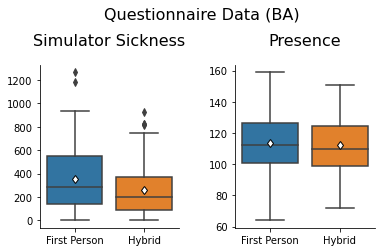

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
plt.subplots_adjust(wspace=0.4)
fig.suptitle('Questionnaire Data (BA)', fontsize=16, y=1.15)

axes = axes.ravel()

sns.set_palette("tab10")

createBoxplot(df[["SSQ_TS_FP", "SSQ_TS_H"]], axes[0], "Simulator Sickness", ["First Person", "Hybrid"])
createBoxplot(df[["P_FP", "P_H"]], axes[1], "Presence", ["First Person", "Hybrid"])

sns.despine()

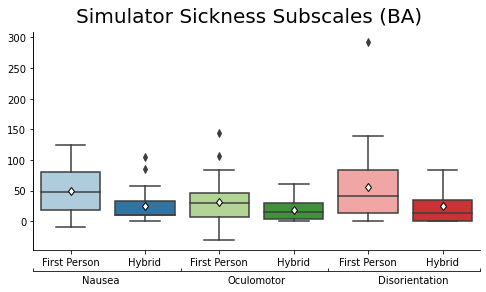

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
fig.suptitle("Simulator Sickness Subscales (BA)", y=0.97, fontsize=20)
plt.subplots_adjust(hspace=0.4)
sns.set_palette("Paired")

createBoxplot(df_BA[['SSQ_N_FP', 'SSQ_N_H', 
                  'SSQ_O_FP', 'SSQ_O_H',
                  'SSQ_D_FP', 'SSQ_D_H']], 
              ax, 
              "",
             ["First Person", "Hybrid"]*3,
             fontsize=16)
secondXAxis(ax, [0.0, 0.33, 0.66, 1.0], [0.15, 0.5, 0.85], ['Nausea', 'Oculomotor', 'Disorientation'])
              
sns.despine()

# Comparisons between ELI-VR data and Linus' BA

- From Linus' BA only the data from the avatar conditions (i.e. hybrid and first person) are used.
- From ELI-VR, only the data from the avatar condition is used (i.e. excluding blob participants).

### Presence

**Hypothesis:** Higher presence in ELI-VR than in BA.

In [42]:
def independent_ttest(sample_greater, sample_less, effect="greater"):
    if stats.levene(sample_greater, sample_less)[1] > 0.05: # check for equal population variances
        return stats.ttest_ind(sample_greater, sample_less, equal_var=True, alternative=effect)
    else:
        return stats.ttest_ind(sample_greater, sample_less, equal_var=False)

In [43]:
# calculate p-values, test statistics, degrees of freedom, and save titles of comparisóns
pvals_presence = []
test_statistics_presence = []
degrees = [] # degrees of freedom
titles_presence = []

res = independent_ttest(df[df["blob"]==0]["P_AVG"], df_BA["P_AVG"])
pvals_presence.append(res[1])
test_statistics_presence.append(res[0])
titles_presence.append("Average presence score")
degrees.append(len(df[df["blob"]==0]["P_AVG"]) + len(df_BA["P_AVG"]) - 2)

res = independent_ttest(df[df["blob"]==0]["P_FP"], df_BA["P_FP"])
pvals_presence.append(res[1])
test_statistics_presence.append(res[0])
titles_presence.append("First person presence score")
degrees.append(len(df[df["blob"]==0]["P_FP"]) + len(df_BA["P_FP"]) - 2)

res = independent_ttest(df[df["blob"]==0]["P_H"], df_BA["P_H"])
pvals_presence.append(res[1])
test_statistics_presence.append(res[0])
titles_presence.append("Hybrid presence score")
degrees.append(len(df[df["blob"]==0]["P_H"]) + len(df_BA["P_H"]) - 2)

corrected_alpha = 0.05 / 3 # we have 3 tests

In [44]:
print("Corrected alpha for presence t-tests: " + str(round(corrected_alpha, 4)))
print("Results:")
for i in range(len(titles_presence)):
    sig = "significant" if pvals_presence[i]<=corrected_alpha else "not significant"
    print("   " + titles_presence[i] + ": ")
    print("      t(" + str(degrees[i]) + ") = " + str(round(test_statistics_presence[i], 3)) + ", p = " + str(round(pvals_presence[i], 3)) + " -> " + sig)

Corrected alpha for presence t-tests: 0.0167
Results:
   Average presence score: 
      t(76) = 6.807, p = 0.0 -> significant
   First person presence score: 
      t(76) = 6.0, p = 0.0 -> significant
   Hybrid presence score: 
      t(76) = 5.609, p = 0.0 -> significant


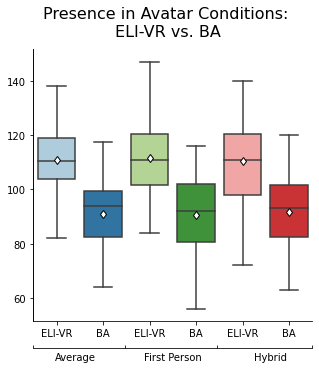

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
fig.suptitle("Presence in Avatar Conditions: \nELI-VR vs. BA", y=1, fontsize=16)
plt.subplots_adjust(hspace=0.4)
sns.set_palette("Paired")

createBoxplot([df[df["blob"]==0]["P_AVG"].tolist(),  df_BA["P_AVG"].tolist(),
               df[df["blob"]==0]["P_FP"].tolist(), df_BA["P_FP"].tolist(),
               df[df["blob"]==0]["P_H"].tolist(), df_BA["P_H"].tolist()], 
              ax, 
              "",
             ["ELI-VR", "BA"]*3)
secondXAxis(ax, [0.0, 0.33, 0.66, 1.0], [0.15, 0.5, 0.85], ['Average', 'First Person', 'Hybrid'])
              
sns.despine()

### Motion sickness (SSQ)

**Hypothesis:** Lower motion sickness in ELI-VR than in BA.

In [46]:
# calculate p-values, test statistics, and save titles of comparisóns
pvals_ssq = []
titles_ssq = []
test_statistics_ssq = []

res = independent_ttest(df[df["blob"]==0]['SSQ_TS_AVG'], df_BA['SSQ_TS_AVG'], effect="less")
pvals_ssq.append(res[1])
test_statistics_ssq.append(res[0])
titles_ssq.append("Average SSQ score")

res = independent_ttest(df[df["blob"]==0]['SSQ_TS_FP'], df_BA['SSQ_TS_FP'], effect="less")
pvals_ssq.append(res[1])
test_statistics_ssq.append(res[0])
titles_ssq.append("First person SSQ score")

res = independent_ttest(df[df["blob"]==0]['SSQ_TS_H'], df_BA["SSQ_TS_H"], effect="less")
pvals_ssq.append(res[1])
test_statistics_ssq.append(res[0])
titles_ssq.append("Hybrid SSQ score")

corrected_alpha = 0.05 / 3 # we have 3 tests

In [47]:
print("Corrected alpha for SSQ t-tests: " + str(round(corrected_alpha, 4)))
print("Results:")
for i in range(len(titles_ssq)):
    sig = "significant" if pvals_ssq[i]<=corrected_alpha else "not significant"
    print("   " + titles_ssq[i] + ": ")
    print("      t(" + str(degrees[i]) + ") = " + str(round(test_statistics_ssq[i], 3)) + ", p = " + str(round(pvals_ssq[i], 3)) + " -> " + sig)

Corrected alpha for SSQ t-tests: 0.0167
Results:
   Average SSQ score: 
      t(76) = -2.045, p = 0.045 -> not significant
   First person SSQ score: 
      t(76) = -2.777, p = 0.008 -> significant
   Hybrid SSQ score: 
      t(76) = -0.261, p = 0.397 -> not significant


In [48]:
df[df["blob"]==0]['SSQ_TS_AVG'].mean()

265.5669627906977

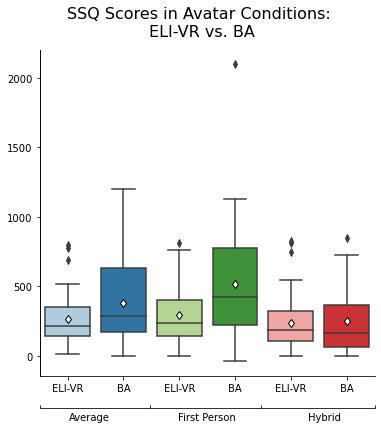

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig.suptitle("SSQ Scores in Avatar Conditions: \nELI-VR vs. BA", y=0.98, fontsize=16)
plt.subplots_adjust(hspace=0.4)
sns.set_palette("Paired")

createBoxplot([df[df["blob"]==0]['SSQ_TS_AVG'].tolist(),  df_BA["SSQ_TS_AVG"].tolist(),
               df[df["blob"]==0]["SSQ_TS_FP"].tolist(), df_BA["SSQ_TS_FP"].tolist(),
               df[df["blob"]==0]["SSQ_TS_H"].tolist(), df_BA["SSQ_TS_H"].tolist()], 
              ax, 
              "",
             ["ELI-VR", "BA"]*3)
secondXAxis(ax, [0.0, 0.33, 0.66, 1.0], [0.15, 0.5, 0.85], ['Average', 'First Person', 'Hybrid'])

sns.despine()
